In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [3]:
datos = pd.read_csv("C:/Users/JHON TORRES/Downloads/logistica/framingham.csv")

In [4]:
datos

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


<Axes: xlabel='age', ylabel='currentSmoker'>

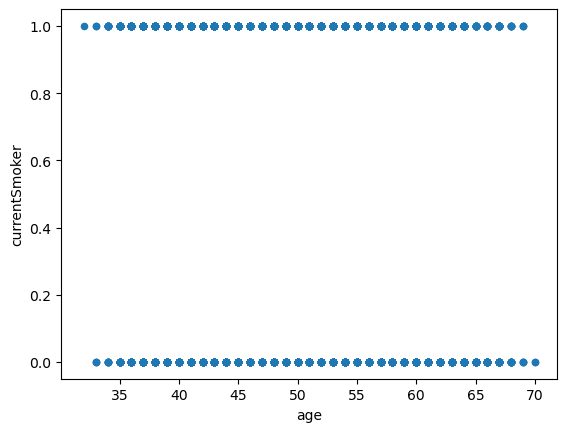

In [53]:
datos[["age", "currentSmoker"]].plot.scatter(x="age", y="currentSmoker")

In [73]:
#pruebas de parametro
w = 0.09
b = -3.6

In [74]:
x = np.linspace(0,datos["age"].max(),100)
y = 1/(1+np.exp(-(w*x+b)))


<function matplotlib.pyplot.show(close=None, block=None)>

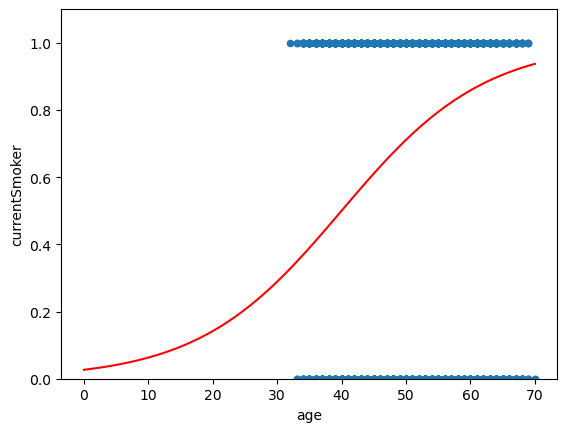

In [75]:
datos.plot.scatter(x="age" , y="currentSmoker")
plt.plot(x, y, "-r")
plt.ylim(0,datos["currentSmoker"].max()*1.1)
plt.show

In [78]:
datos["sigmoid"]=1/(1+np.exp(-(datos["age"]*w+b)))
datos["loss_xi"]=-datos["currentSmoker"]*np.log(datos["sigmoid"])-(1-datos["currentSmoker"])*np.log(1-datos["sigmoid"])
cost_j=datos["loss_xi"].mean()
cost_j

0.9302787910799367

In [80]:
array=np.mgrid[0.15:0.20:.013, -3:-2.5:0.1].reshape(2,-1).T
df=pd.DataFrame(data=array, columns = ["w", "b"])
df["w"]=np.round(df["w"],6)
df["b"]=np.round(df["b"],6)

In [81]:
df

,w,b
0,0.150,-3.0
1,0.150,-2.9
2,0.150,-2.8
3,0.150,-2.7
4,0.150,-2.6
5,0.163,-3.0
6,0.163,-2.9
7,0.163,-2.8
8,0.163,-2.7
9,0.163,-2.6


In [82]:
def sum_error_df(df):
    datos["sigmoid"]=1/(1+np.exp(-(datos["age"]*df["w"]+df["b"])))
    datos["loss_xi"]=-datos["currentSmoker"]*np.log(datos["sigmoid"])-(1-datos["currentSmoker"])*np.log(1-datos["sigmoid"])
    cost_j=datos["loss_xi"].mean()
    return(cost_j)

In [83]:
df["error"]=df.apply(sum_error_df, axis=1)

In [84]:
df.sort_values(by=["error"]).head()

,w,b,error
0,0.15,-3.0,2.405207
1,0.15,-2.9,2.453677
2,0.15,-2.8,2.502341
3,0.15,-2.7,2.551181
4,0.15,-2.6,2.600183


In [85]:
df_3d = df.pivot(index="w", columns="b", values="error")

In [86]:
df_3d.head()

b,-3.0,-2.9,-2.8,-2.7,-2.6
w,,,,,
0.150,2.405207,2.453677,2.502341,2.551181,2.600183
0.163,2.733855,2.783187,2.832636,2.882191,2.931843
0.176,3.066368,3.116213,3.166128,3.216105,3.266141
0.189,3.401150,3.451298,3.501488,3.551715,3.601977


In [87]:
import matplotlib as mlp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

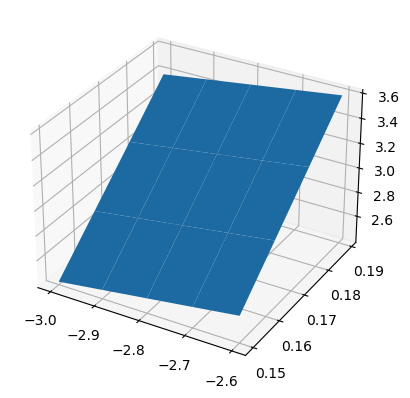

In [88]:
x=df_3d.columns
y=df_3d.index
x,y=np.meshgrid(x,y)
z=df_3d
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.plot_surface(x,y,z)